In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import sys
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

# Extraction

In [2]:
# Kedro Catalog
raw_data_sensors = catalog.load('raw_data_sensors_api')

2022-09-06 12:20:09,487 - kedro.io.data_catalog - INFO - Loading data from `raw_data_sensors_api` (CSVDataSet)...


In [3]:
# Raw Data Sensors from InfluxDB API
raw_data_sensors.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-04T00:00:00-05:00,5,NaN,4.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,1.0,NaN
1,2022-09-04T00:00:30-05:00,6,5.0,4.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0
2,2022-09-04T00:01:00-05:00,5,7.0,4.0,7.0,8.0,7.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0
3,2022-09-04T00:01:30-05:00,6,7.0,4.0,7.0,8.0,8.0,3.0,0.0,0.0,0.0,3.0,1.0,6.0
4,2022-09-04T00:02:00-05:00,6,8.0,4.0,7.0,9.0,8.0,5.0,0.0,2.0,0.0,4.0,1.0,6.0


## Descriptive Statistics

In [4]:
# Describe Data
raw_data_sensors.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,2749.000000,2714.000000,1626.000000,2715.000000,2706.000000,2710.000000,2676.00000,2685.000000,2626.000000,2654.000000,2679.000000,2658.000000,2713.000000
mean,10.834121,13.106116,6.730627,15.861142,13.616408,12.519557,7.45142,2.243948,5.446306,12.206858,10.727137,9.142965,12.498341
std,6.840254,8.897405,2.059427,10.114099,9.488583,8.420485,3.60097,3.828827,3.908132,40.509158,6.296197,34.636831,7.479329
min,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000
25%,6.000000,6.000000,5.000000,8.000000,7.000000,7.000000,5.00000,0.000000,2.000000,1.000000,6.000000,2.000000,7.000000
50%,8.000000,8.000000,6.000000,10.000000,9.000000,9.000000,7.00000,2.000000,6.000000,10.000000,10.000000,7.000000,9.000000
75%,13.000000,20.000000,8.000000,24.000000,20.000000,15.000000,9.00000,3.000000,8.000000,15.000000,14.000000,10.000000,15.000000
max,34.000000,47.000000,15.000000,53.000000,81.000000,40.000000,71.00000,55.000000,24.000000,1123.000000,66.000000,985.000000,43.000000


In [5]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

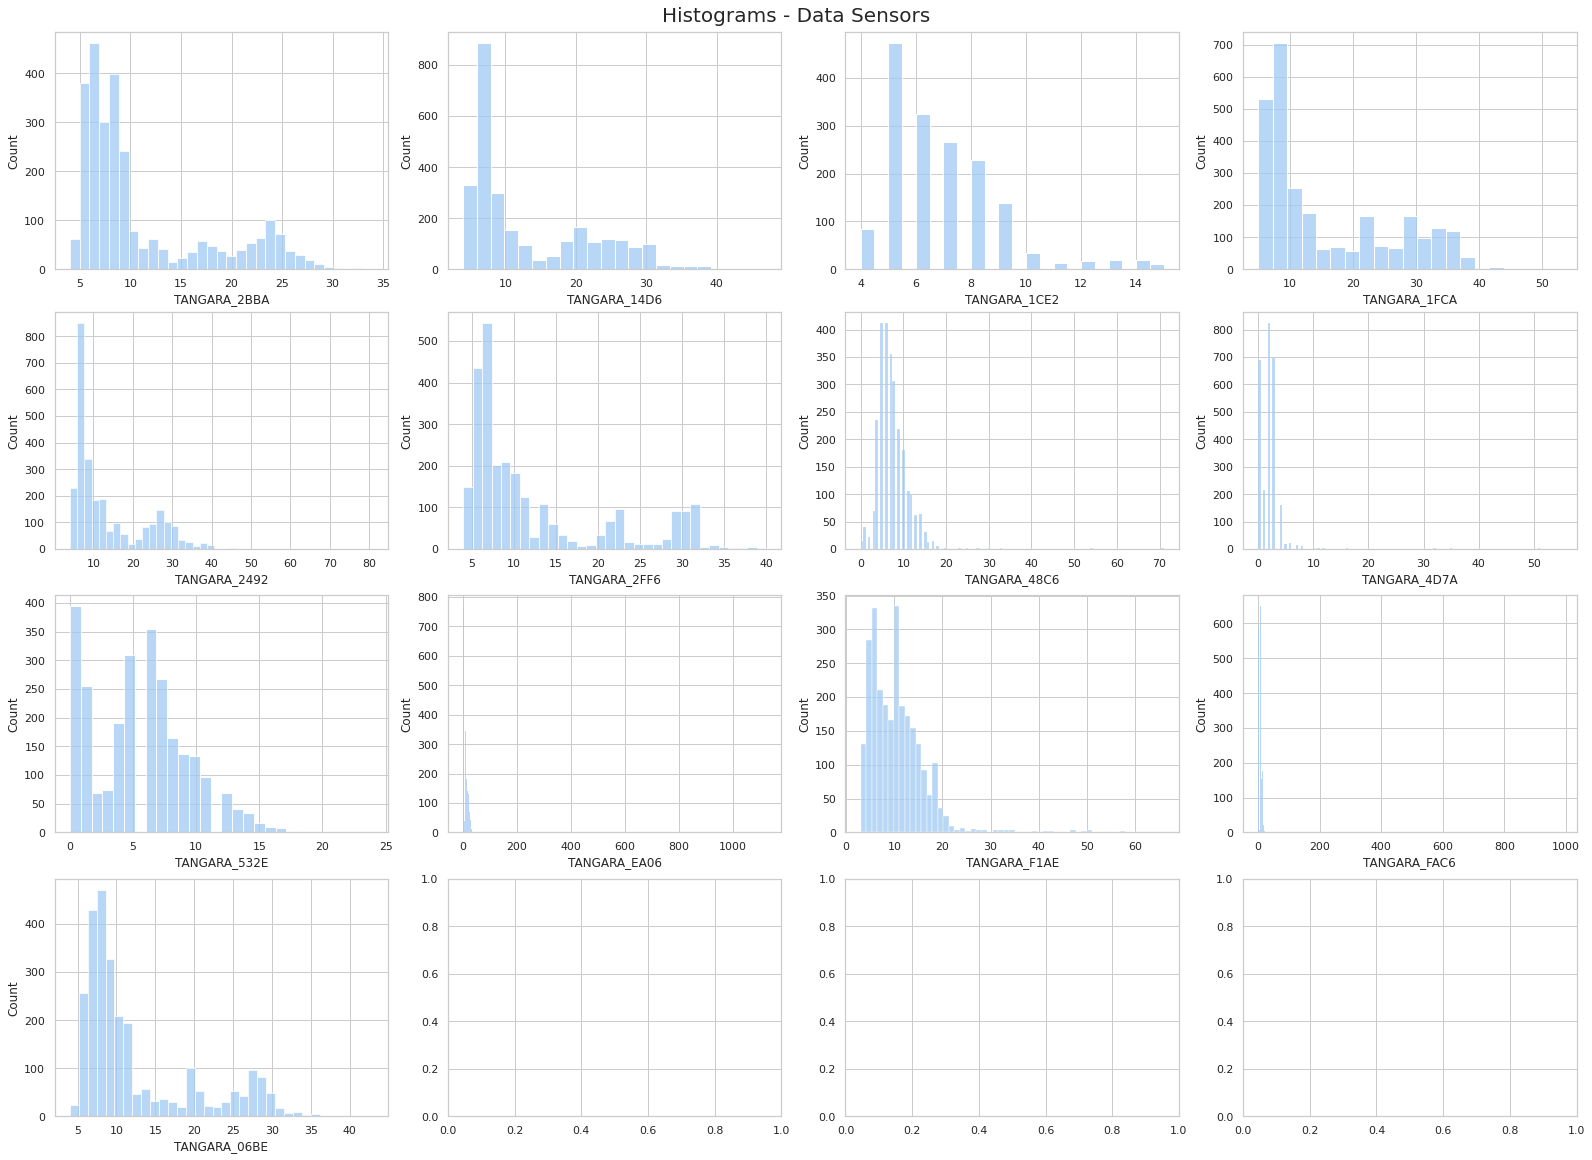

In [6]:
# Plot Histograms
histplots(raw_data_sensors)

In [7]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

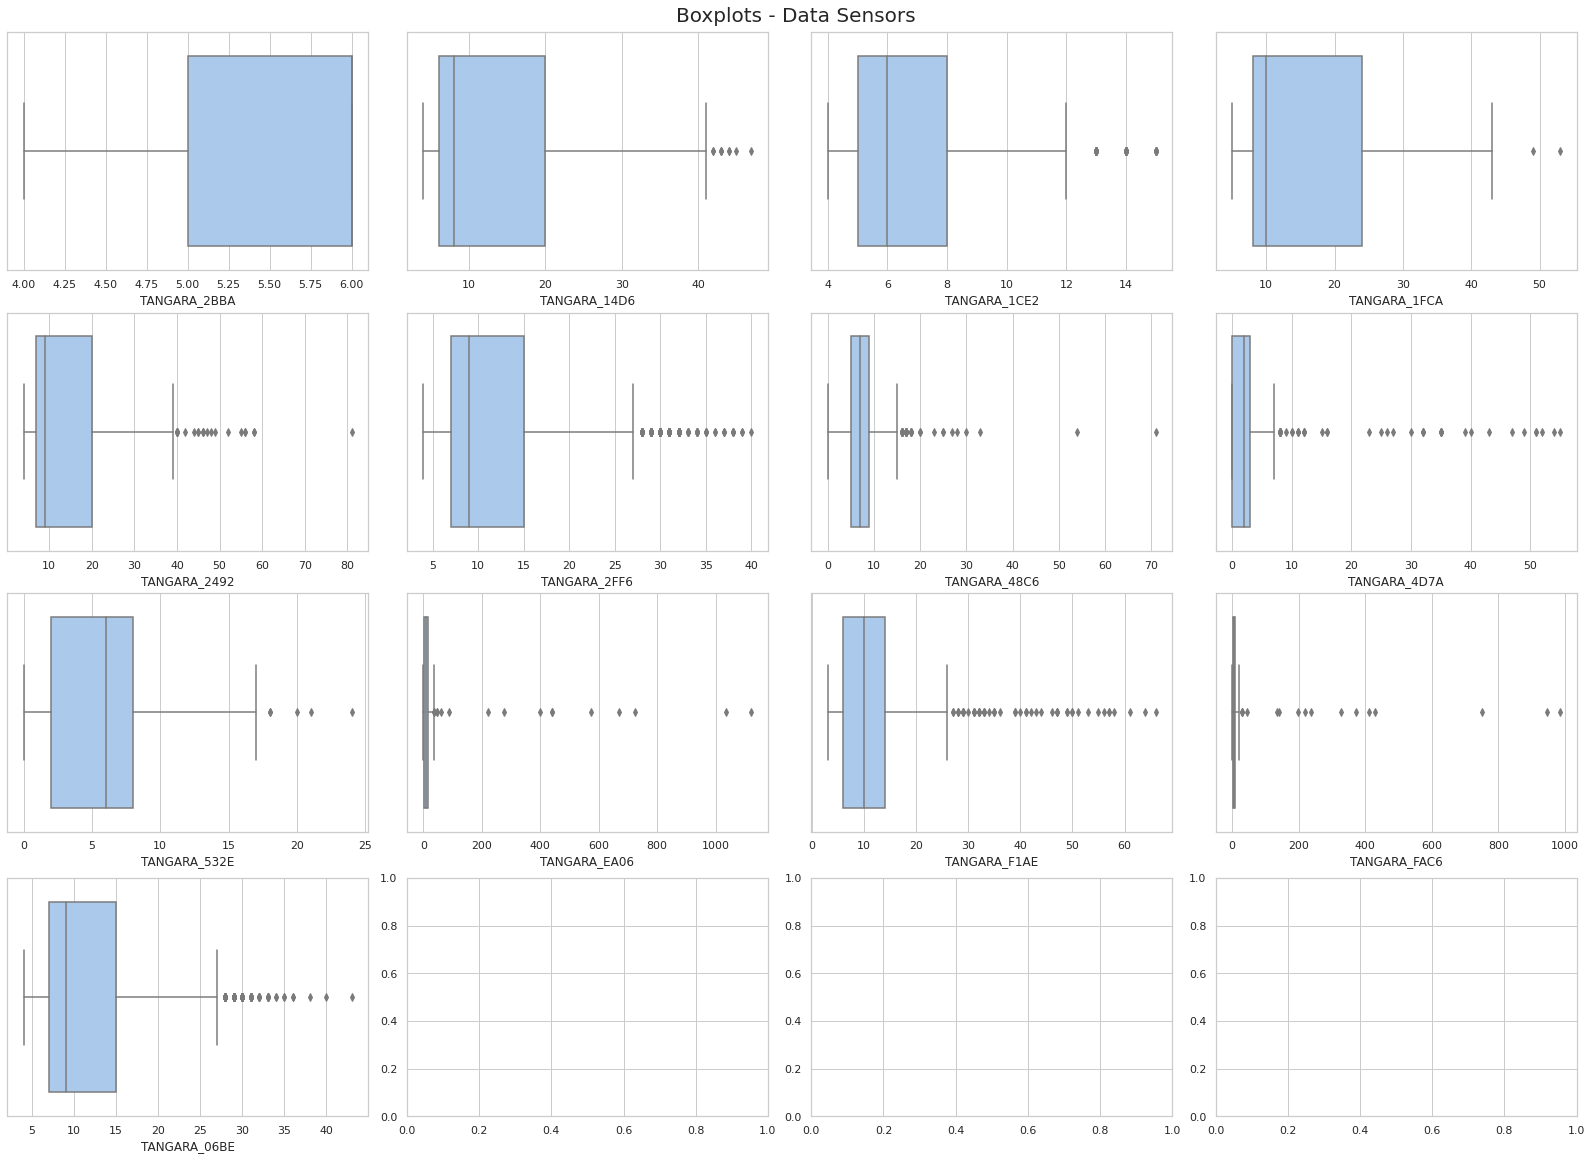

In [8]:
# Plot Boxplots
boxplots(raw_data_sensors)

## Drop Outliers

### Air Quality Index Scale and Color Legend

[https://aqicn.org/scale/](https://aqicn.org/scale/)

The table below defines the Air Quality Index scale as defined by the US-EPA 2016 standard:

<style>
    .aqivalues th { background: white; color: black; }
    .aqivalues tr { color: black; }
    .aqivalues tr:nth-child(1) { background: #009966; }
    .aqivalues tr:nth-child(2) { background: #ffde33; }
    .aqivalues tr:nth-child(3) { background: #ff9933; }
    .aqivalues tr:nth-child(4) { background: #cc0033; }
    .aqivalues tr:nth-child(5) { background: #660099; }
    .aqivalues tr:nth-child(6) { background: #7e0023; }
</style>

<div class="aqivalues">

| AQI\* | Air Pollution Level | Health Implications  | Cautionary Statement (for PM2.5) |
| --- | --- | --- | --- |
| 0 - 50 | Good | Air quality is considered satisfactory, and air pollution poses little or no risk. | None |
| 51 -100 | Moderate | Air quality is acceptable; however, for some pollutants, there may be a moderate health concern for a very small number of people who are unusually sensitive to air pollution. | Active children, adults, and people with respiratory diseases, such as asthma, should limit prolonged outdoor exertion. |
| 101-150 | Unhealthy for Sensitive Groups | Members of sensitive groups may experience health effects. The general public is not likely to be affected. | Active children, adults, and people with respiratory diseases, such as asthma, should limit prolonged outdoor exertion. |
| 151-200 | Unhealthy | Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects. | Active children, adults, and people with respiratory diseases, such as asthma, should avoid prolonged outdoor exertion; everyone else, especially children, should limit prolonged outdoor exertion. |
| 201-300 | Very Unhealthy | Health warnings of emergency conditions. The entire population is more likely to be affected. | Active children, adults, and people with respiratory diseases, such as asthma, should avoid all outdoor exertion; everyone else, especially children, should limit outdoor exertion. |
| 300+ | Hazardous | Health alert: everyone may experience more serious health effects. | Everyone should avoid all outdoor exertion. |

</div>

In [9]:
# AQI Scale
aqi_scale = (
    ("Good", 0, 50),
    ("Moderate", 51, 100),
    ("Unhealthy for Sensitive Groups", 101, 150),
    ("Unhealthy", 151, 200),
    ("Very Unhealthy", 201, 300),
    ("Harzardous", 301, sys.maxsize),
)
# Max AQI Scale Value
max_aqi_value = aqi_scale[-1][1]
max_aqi_value

301

In [10]:
# Drop Outliers
def drop_outliers(data_sensors):
    # Each Data Sensor
    for column in data_sensors.columns:
        if column != 'DATETIME':
            # Apply mask to max value allowed, Max AQI Scale Value
            data_sensors[column] = data_sensors[column].mask(data_sensors[column] > max_aqi_value, max_aqi_value)
            
            # Standard Deviation
            std = data_sensors[column].std()
            # Range = max value - min value
            rango = data_sensors[column].max() - data_sensors[column].min()
            # Quantiles
            media = data_sensors[column].median()
            Q1 = data_sensors[column].quantile(q=0.25)
            Q2 = data_sensors[column].quantile(q=0.50)
            Q3 = data_sensors[column].quantile(q=0.75)
            min_val = data_sensors[column].quantile(q=0)
            max_val = data_sensors[column].quantile(q=1.0)
            # Interquartil Range
            iqr = Q3 - Q1
            # Limites para deteccion de outliers (solo aplica para datos simetricamente distribuidos)**
            min_limit = Q1 - 1.5 * iqr
            max_limit = Q3 + 1.5 * iqr
            # Medidas de Tendencia Central**
            str_resume = f"{column}:\n"\
                        f"std: {std}\n"\
                        f"rango: {rango}\n"\
                        f"media: {media}\n"\
                        f"Q1: {Q1}\n"\
                        f"Q2: {Q2}\n"\
                        f"Q3: {Q3}\n"\
                        f"min_val: {min_val}\n"\
                        f"max_val: {max_val}\n"\
                        f"iqr: {iqr}\n"\
                        f"min_limit: {min_limit}\n"\
                        f"max_limit: {max_limit}\n\n"
            #print(str_resume)

            # Drop Outliers, using max_limit to apply mask and drop outliers
            data_sensors[column] = data_sensors[column].mask(data_sensors[column] > max_limit, None)
    
    return data_sensors

In [11]:
# Eliminar Outliers
data_sensors = drop_outliers(raw_data_sensors.copy())
data_sensors.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-04T00:00:00-05:00,5.0,NaN,4.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,1.0,NaN
1,2022-09-04T00:00:30-05:00,6.0,5.0,4.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0
2,2022-09-04T00:01:00-05:00,5.0,7.0,4.0,7.0,8.0,7.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0
3,2022-09-04T00:01:30-05:00,6.0,7.0,4.0,7.0,8.0,8.0,3.0,0.0,0.0,0.0,3.0,1.0,6.0
4,2022-09-04T00:02:00-05:00,6.0,8.0,4.0,7.0,9.0,8.0,5.0,0.0,2.0,0.0,4.0,1.0,6.0


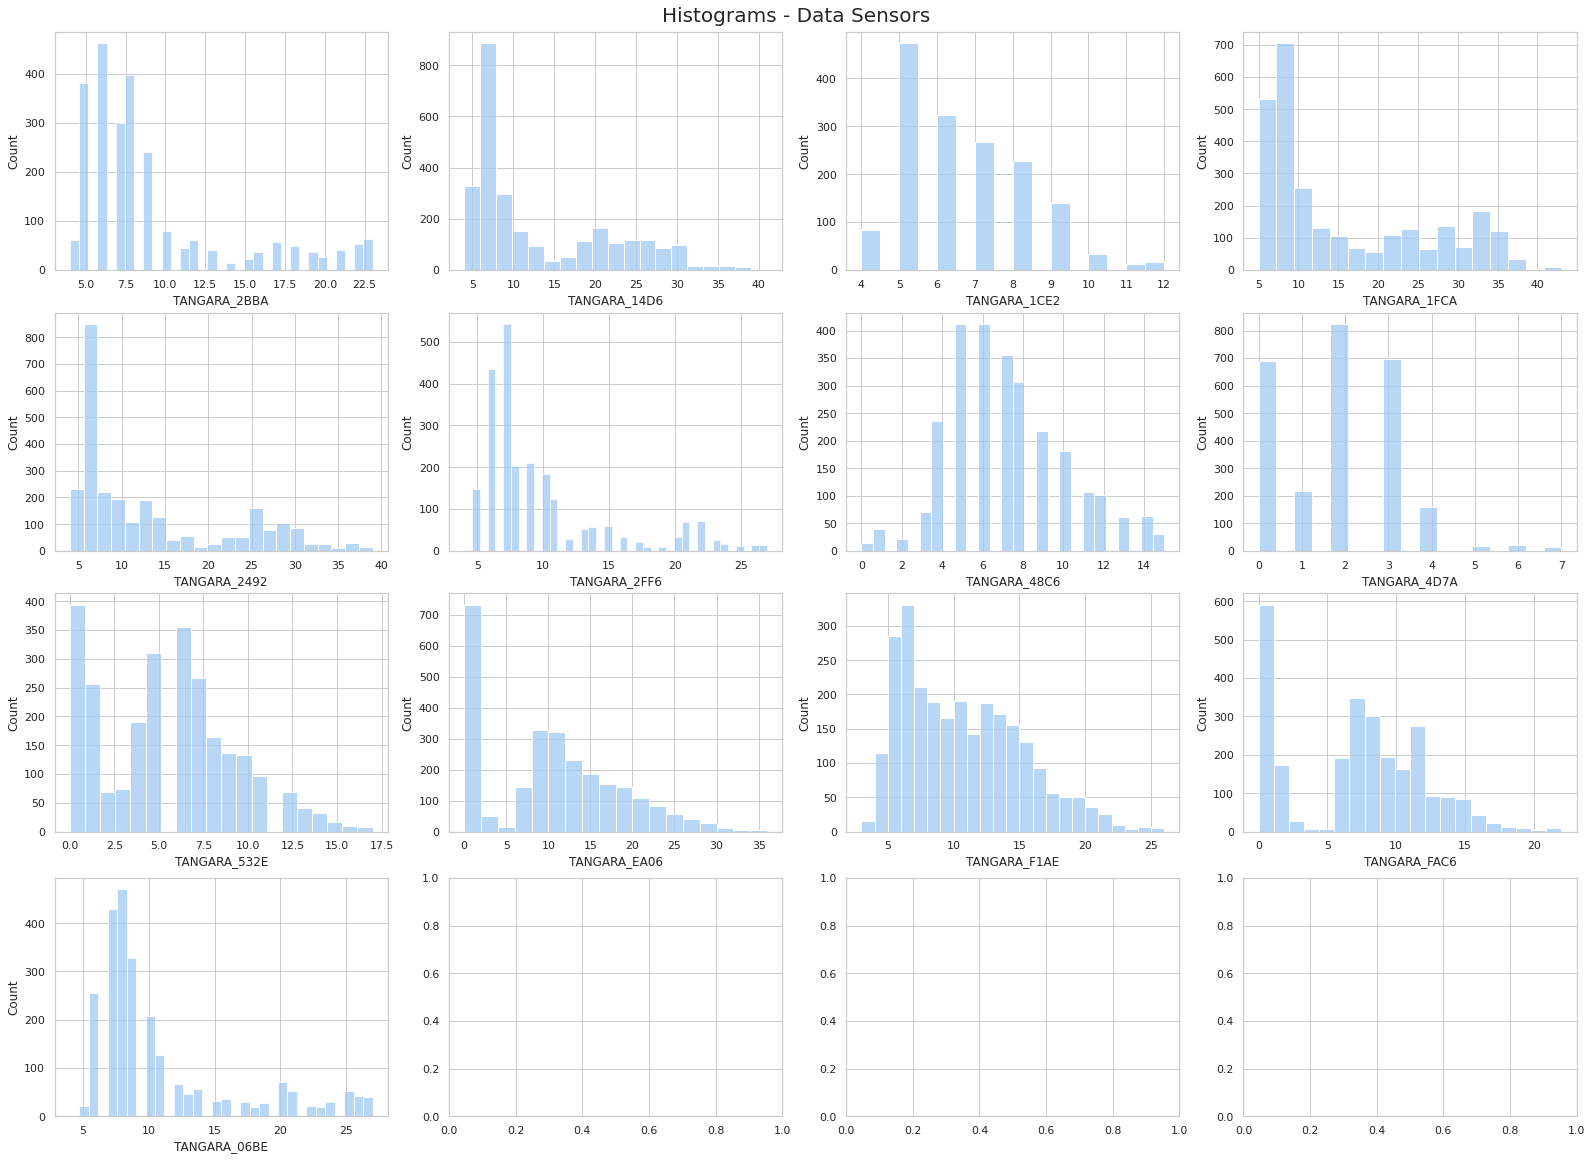

In [12]:
# Plot Histogramas
histplots(data_sensors)

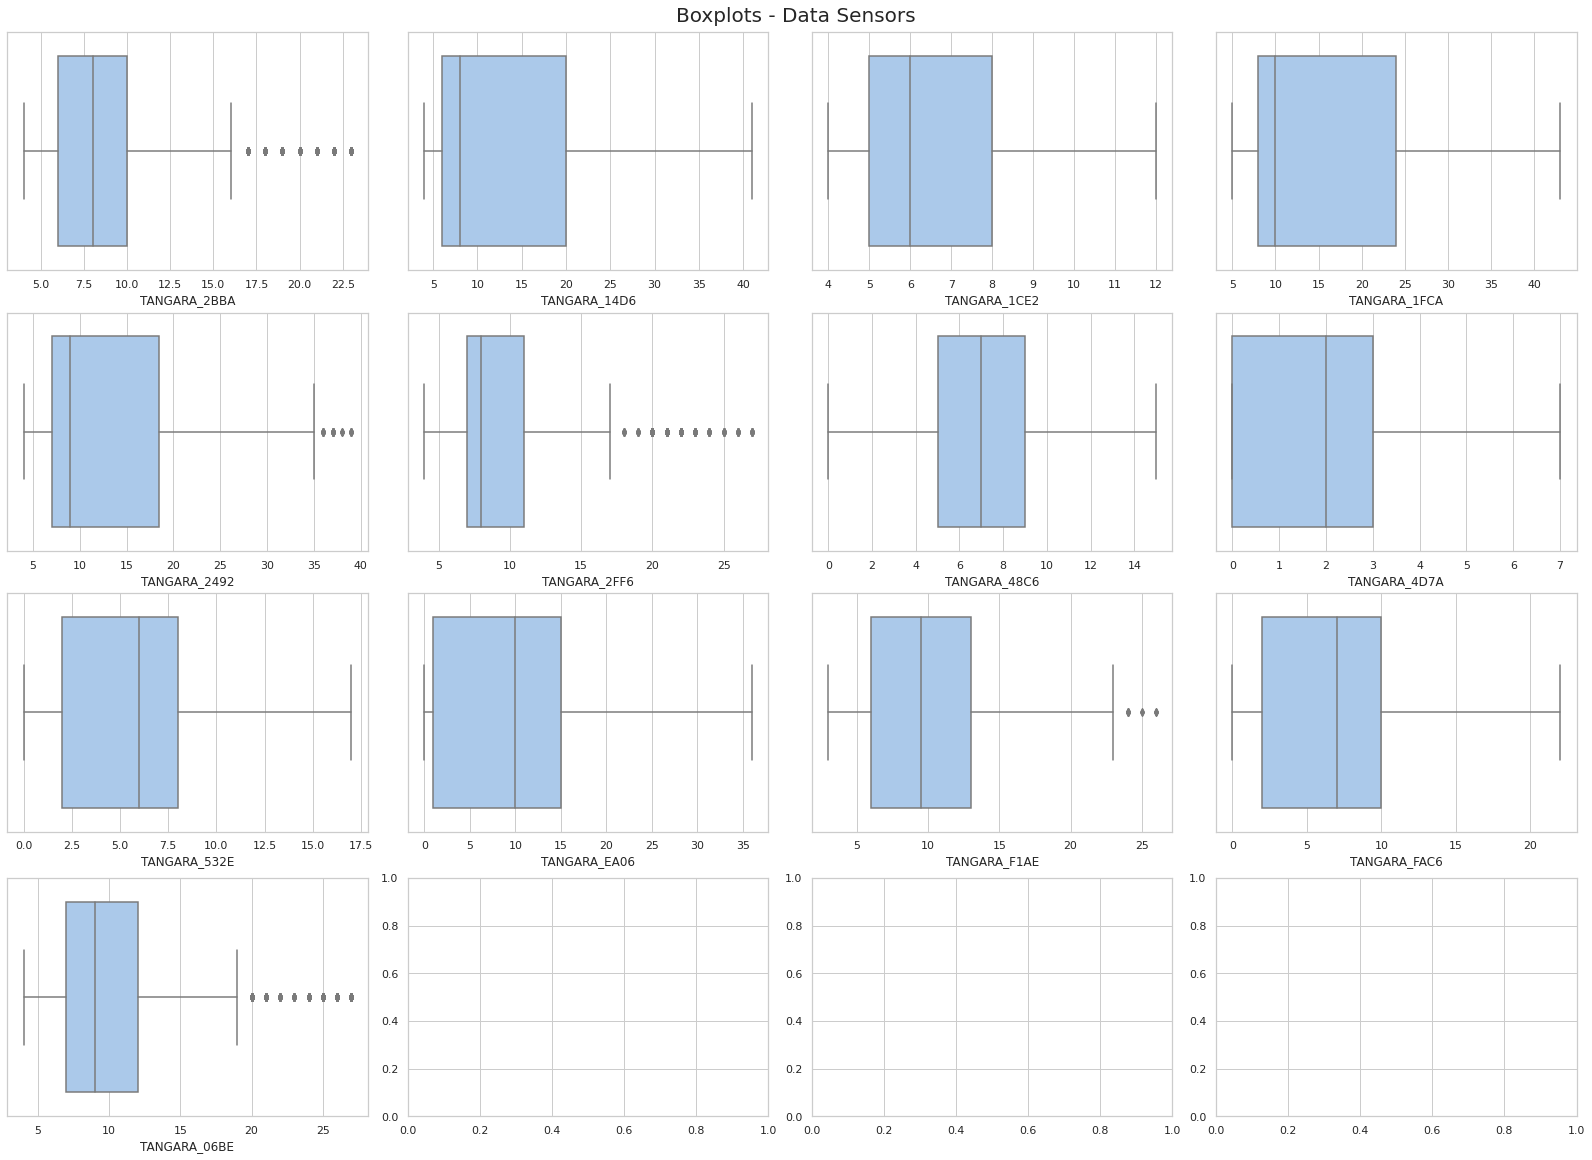

In [13]:
# Plot Boxplot
boxplots(data_sensors)

In [14]:
# Describe Data
data_sensors.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,2469.000000,2705.000000,1576.000000,2713.000000,2683.000000,2363.000000,2631.000000,2638.000000,2621.000000,2638.000000,2626.000000,2642.000000,2483.000000
mean,9.159174,13.004436,6.506345,15.835238,13.317928,9.881083,7.226530,1.857847,5.418161,9.925701,10.130617,7.196821,10.910592
std,4.913286,8.735045,1.649615,10.072549,8.921562,5.132024,2.906986,1.390374,3.857069,7.919040,4.482015,4.693388,5.569506
min,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000
25%,6.000000,6.000000,5.000000,8.000000,7.000000,7.000000,5.000000,0.000000,2.000000,1.000000,6.000000,2.000000,7.000000
50%,8.000000,8.000000,6.000000,10.000000,9.000000,8.000000,7.000000,2.000000,6.000000,10.000000,9.500000,7.000000,9.000000
75%,10.000000,20.000000,8.000000,24.000000,18.500000,11.000000,9.000000,3.000000,8.000000,15.000000,13.000000,10.000000,12.000000
max,23.000000,41.000000,12.000000,43.000000,39.000000,27.000000,15.000000,7.000000,17.000000,36.000000,26.000000,22.000000,27.000000


In [15]:
# Timestamp Format
data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
data_sensors.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-04 00:00:00-05:00,5.0,NaN,4.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,1.0,NaN
1,2022-09-04 00:00:30-05:00,6.0,5.0,4.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0
2,2022-09-04 00:01:00-05:00,5.0,7.0,4.0,7.0,8.0,7.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0
3,2022-09-04 00:01:30-05:00,6.0,7.0,4.0,7.0,8.0,8.0,3.0,0.0,0.0,0.0,3.0,1.0,6.0
4,2022-09-04 00:02:00-05:00,6.0,8.0,4.0,7.0,9.0,8.0,5.0,0.0,2.0,0.0,4.0,1.0,6.0


In [16]:
# Add DateTime string values to Data Sensors
def add_datetime_str_values(data_sensors):
    # Date value string
    data_sensors['DATE'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%x'))
    # Time value string
    data_sensors['TIME'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%T'))
    # Weekday value string
    data_sensors['WEEKDAY'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%A'))
    # Month value string
    data_sensors['MONTH'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%B'))
    # Year value string
    data_sensors['YEAR'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%Y'))
    
    return data_sensors

In [17]:
# Data Sensors with DateTime string values
data_sensors = add_datetime_str_values(data_sensors)
data_sensors.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,DATE,TIME,WEEKDAY,MONTH,YEAR
0,2022-09-04 00:00:00-05:00,5.0,NaN,4.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,1.0,NaN,09/04/22,00:00:00,Sunday,September,2022
1,2022-09-04 00:00:30-05:00,6.0,5.0,4.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,09/04/22,00:00:30,Sunday,September,2022
2,2022-09-04 00:01:00-05:00,5.0,7.0,4.0,7.0,8.0,7.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,09/04/22,00:01:00,Sunday,September,2022
3,2022-09-04 00:01:30-05:00,6.0,7.0,4.0,7.0,8.0,8.0,3.0,0.0,0.0,0.0,3.0,1.0,6.0,09/04/22,00:01:30,Sunday,September,2022
4,2022-09-04 00:02:00-05:00,6.0,8.0,4.0,7.0,9.0,8.0,5.0,0.0,2.0,0.0,4.0,1.0,6.0,09/04/22,00:02:00,Sunday,September,2022


In [18]:
# Save data_sensors into Catalog
catalog.save('pm25', data_sensors)

2022-09-06 12:20:50,189 - kedro.io.data_catalog - INFO - Saving data to `pm25` (CSVDataSet)...
